In [ ]:
### Setup

In [4]:
from tensorflow import keras

In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [ ]:
### load the data

In [9]:
df = pd.read_csv("C:\\Users\\Asus user\\Downloads\\archive (3)\\GOOGL.csv")


In [ ]:
## quick look at the data

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [ ]:
## we will deal with closing price each day

In [11]:
df = df[['Date', 'Close']]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4431 non-null   object 
 1   Close   4431 non-null   float64
dtypes: float64(1), object(1)
memory usage: 69.4+ KB


In [ ]:
### Data time period

In [13]:
df['Date'].min(), df['Date'].max()

('2004-08-19', '2022-03-24')

In [ ]:
### visualize the data

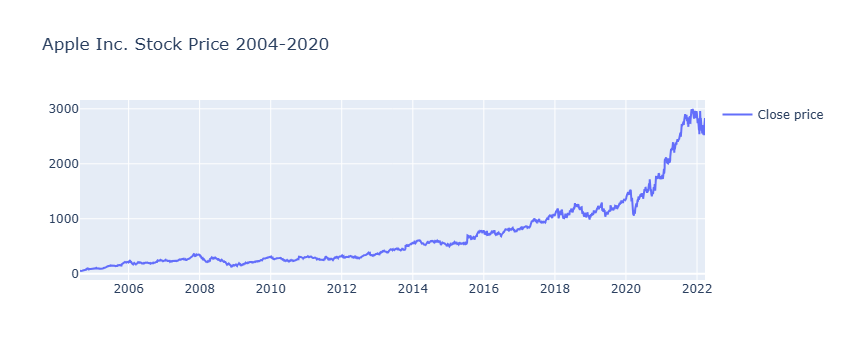

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close price'))
fig.update_layout(showlegend=True, title='Apple Inc. Stock Price 2004-2020')
fig.show()

In [ ]:
### Data Preprocessing
## trian-test split

In [15]:
train = df.loc[df['Date'] <= '2017-12-24']
test = df.loc[df['Date'] > '2017-12-24']
train.shape, test.shape

((3362, 2), (1069, 2))

In [ ]:
## data scaling

In [16]:
scaler = StandardScaler()
scaler = scaler.fit(np.array(train['Close']).reshape(-1,1))

train['Close'] = scaler.transform(np.array(train['Close']).reshape(-1,1))
test['Close'] = scaler.transform(np.array(test['Close']).reshape(-1,1))

C:\Users\Asus user\AppData\Local\Temp\ipykernel_1688\3901342107.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Asus user\AppData\Local\Temp\ipykernel_1688\3901342107.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



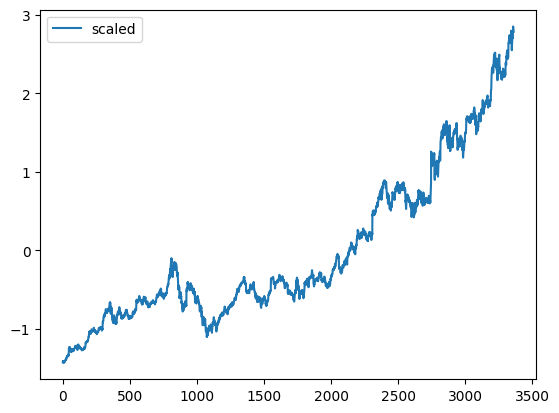

In [17]:
# Visualize scaled data
plt.plot(train['Close'], label = 'scaled')
plt.legend()
plt.show()

In [ ]:
## Create sequences

In [18]:
TIME_STEPS=30

def create_sequences(X, y, time_steps=TIME_STEPS):
    X_out, y_out = [], []
    for i in range(len(X)-time_steps):
        X_out.append(X.iloc[i:(i+time_steps)].values)
        y_out.append(y.iloc[i+time_steps])
    
    return np.array(X_out), np.array(y_out)

X_train, y_train = create_sequences(train[['Close']], train['Close'])
X_test, y_test = create_sequences(test[['Close']], test['Close'])
print("Training input shape: ", X_train.shape)
print("Testing input shape: ", X_test.shape)

Training input shape:  (3332, 30, 1)
Testing input shape:  (1039, 30, 1)


In [19]:
X_train[3331]

array([[2.69614816],
       [2.68138521],
       [2.66918565],
       [2.67100546],
       [2.6493777 ],
       [2.69924967],
       [2.64722724],
       [2.64214085],
       [2.70681767],
       [2.7135169 ],
       [2.73253938],
       [2.7965958 ],
       [2.76053573],
       [2.65338886],
       [2.64838526],
       [2.60248255],
       [2.54789623],
       [2.57986235],
       [2.63411802],
       [2.68312173],
       [2.70301297],
       [2.71372337],
       [2.70049048],
       [2.71132505],
       [2.73646775],
       [2.7965544 ],
       [2.8506859 ],
       [2.82872749],
       [2.80300578],
       [2.79179866]])

In [21]:
import tensorflow as tf


In [22]:
# set seed to regenerate same sequence of random numbers. 
np.random.seed(21)
tf.random.set_seed(21)

In [ ]:
### build a model
## we are building LSTM autoencoder model. The model will take iput shape(batch_size,sequence)_length,num_features) and return output of same shape


In [23]:
model = Sequential()
model.add(LSTM(128, activation = 'tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, activation = 'tanh', return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

D:\ttttttt\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 1)          │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
### Train model

In [24]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')],
                    shuffle=False)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0803 - val_loss: 0.1184
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0208 - val_loss: 0.0701
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0193 - val_loss: 0.0532
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0233 - val_loss: 0.0524
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0168 - val_loss: 0.0275
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0156 - val_loss: 0.0307
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.0134 - val_loss: 0.0200
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0124 - val_loss: 0.0199
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0125 - val_loss: 0.0193
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0127 - val_loss: 0.0230
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0128 - val_loss: 0.0188
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/ste

In [ ]:
### plot training-validation loss

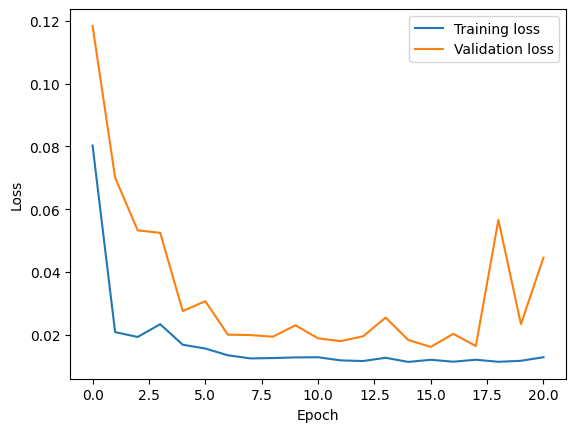

In [25]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step
Reconstruction error threshold: 0.48248502129581183


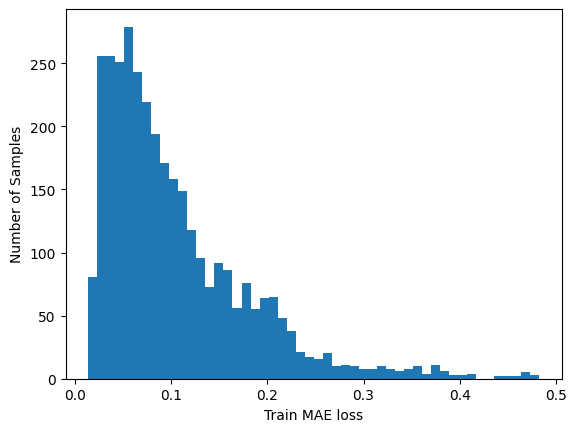

In [26]:
# Mean Absolute Error loss
X_train_pred = model.predict(X_train)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');

# Set reconstruction error threshold
threshold = np.max(train_mae_loss)

print('Reconstruction error threshold:',threshold)

In [ ]:
### Predict anomalies on test data using threshold

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Text(0, 0.5, 'Number of samples')

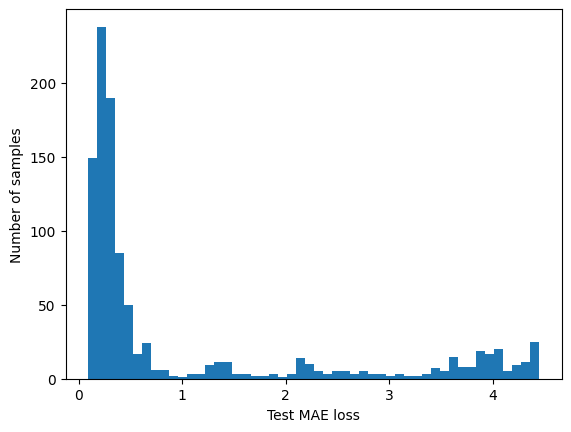

In [27]:
X_test_pred = model.predict(X_test, verbose=1)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples')

In [28]:
anomaly_df = pd.DataFrame(test[TIME_STEPS:])
anomaly_df['loss'] = test_mae_loss
anomaly_df['threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['loss'] > anomaly_df['threshold']

In [29]:
anomaly_df.head()

,Date,Close,loss,threshold,anomaly
3392,2018-02-08,2.530693,0.185687,0.482485,False
3393,2018-02-09,2.690152,0.166145,0.482485,False
3394,2018-02-12,2.724434,0.166646,0.482485,False
3395,2018-02-13,2.722697,0.165933,0.482485,False
3396,2018-02-14,2.799449,0.170810,0.482485,False


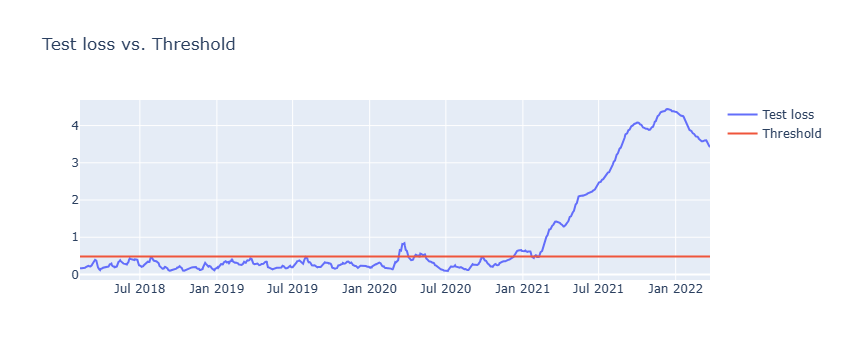

In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=anomaly_df['Date'], y=anomaly_df['loss'], name='Test loss'))
fig.add_trace(go.Scatter(x=anomaly_df['Date'], y=anomaly_df['threshold'], name='Threshold'))
fig.update_layout(showlegend=True, title='Test loss vs. Threshold')
fig.show()

In [31]:
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]
anomalies.head()

,Date,Close,loss,threshold,anomaly
3917,2020-03-12,2.960107,0.528466,0.482485,True
3918,2020-03-13,3.384890,0.656156,0.482485,True
3919,2020-03-16,2.800690,0.642147,0.482485,True
3920,2020-03-17,2.987029,0.754079,0.482485,True
3921,2020-03-18,2.875911,0.774646,0.482485,True


In [32]:
anomalies.shape

(350, 5)

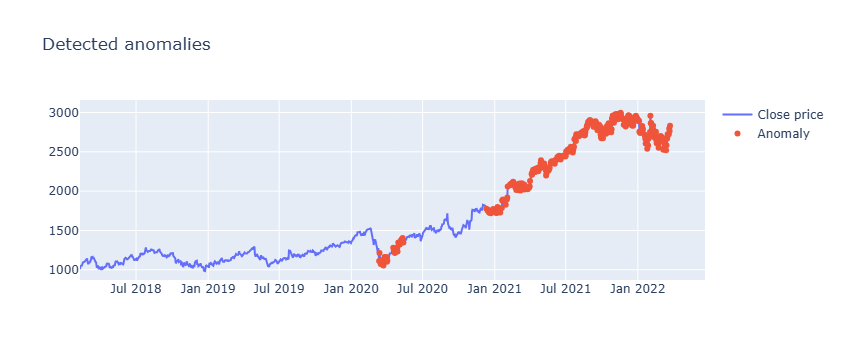

In [34]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=anomaly_df['Date'],
        y=scaler.inverse_transform(anomaly_df[['Close']]).ravel(),
        name='Close price'))

fig.add_trace(
    go.Scatter(
        x=anomalies['Date'],
        y=scaler.inverse_transform(anomalies[['Close']]).ravel(),
        mode='markers',
        name='Anomaly' ))

fig.update_layout(showlegend=True, title='Detected anomalies')
